<a href="https://colab.research.google.com/github/gustavods07/Credit-Risk-Data-Analysis/blob/master/credit_risk_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRIRIES:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**APPLIED DATASET:** https://www.kaggle.com/laotse/credit-risk-dataset

**READING THE .CSV FILE AND DISPLAYING THE DATA DISPOSITION:**

In [3]:
data = pd.read_csv('/content/sample_data/credit_risk_dataset.csv')
data ## displays the data disposition

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


**COUNTING THE UNIQUE VALUES OF A COLUMN (IN THIS CASE, THE 'person_age' COLUMN) FROM A FILTERED AMOUNT OF DATA:**




In [9]:
loan_people = np.unique(data['loan_status'], return_counts = True) ## it is possible to comprehend how much people of this dataset are or aren't in debts
default = data[data['loan_status'] == 1] ## here the data is filtered to group only the data from people with debts (loan_status = 1) into the default variable
age_diversity = np.unique(default['person_age']) ## it is possible to understand how diverse is this dataset in terms of age
print(loan_people)
print(age_diversity)

(array([0, 1]), array([25473,  7108]))
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 70]


**PLOTING THE OBTAINED DATA FROM THE PREVIOUS COMMAND INTO GRAPHS:**

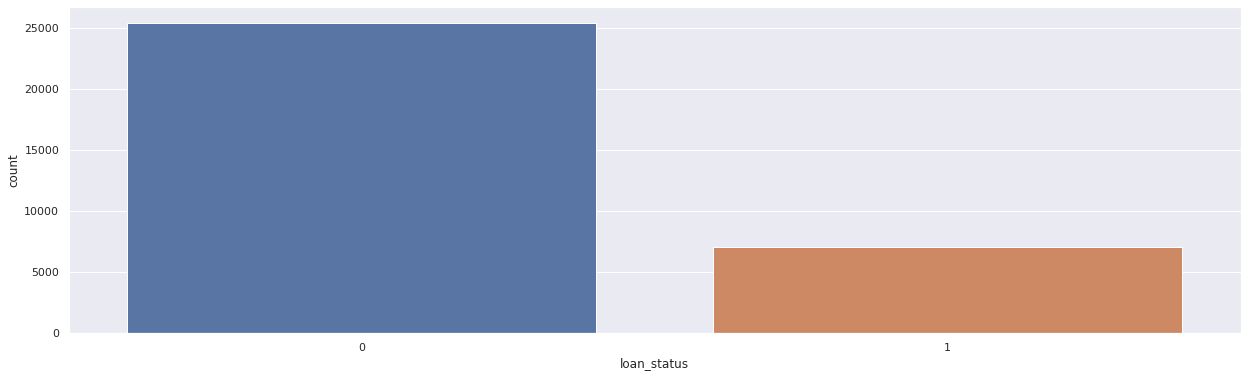

In [13]:
sns.countplot(x = data['loan_status']);
## it is possible to comprehend the loan status disposition of the people monitored in this dataset
## 0 = without debts, 1 = in debts

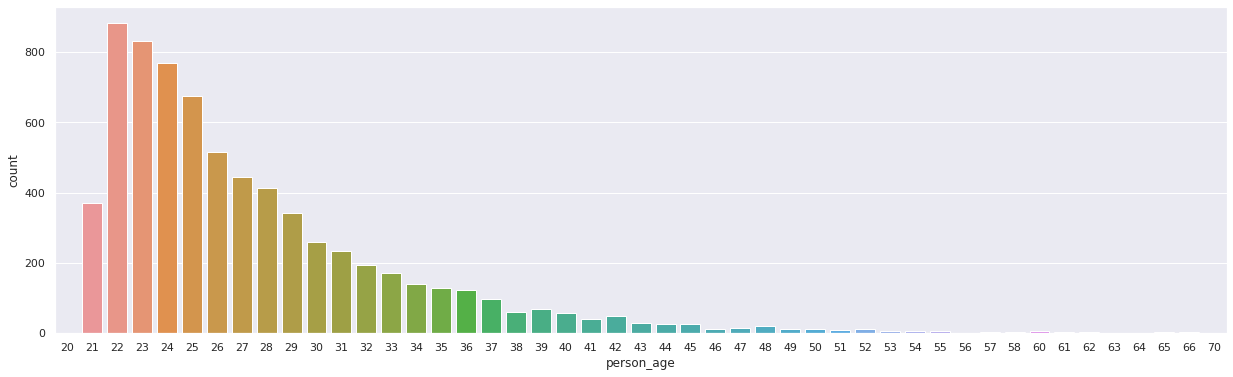

In [14]:
sns.set(rc = {'figure.figsize':(21,6)}) ## changes the plot dimensions to display correctly the parameters
sns.countplot(x = default['person_age']); ## shows how much people have the documented ages
## it is possible to comprehend the age disposition of the people monitored in this dataset

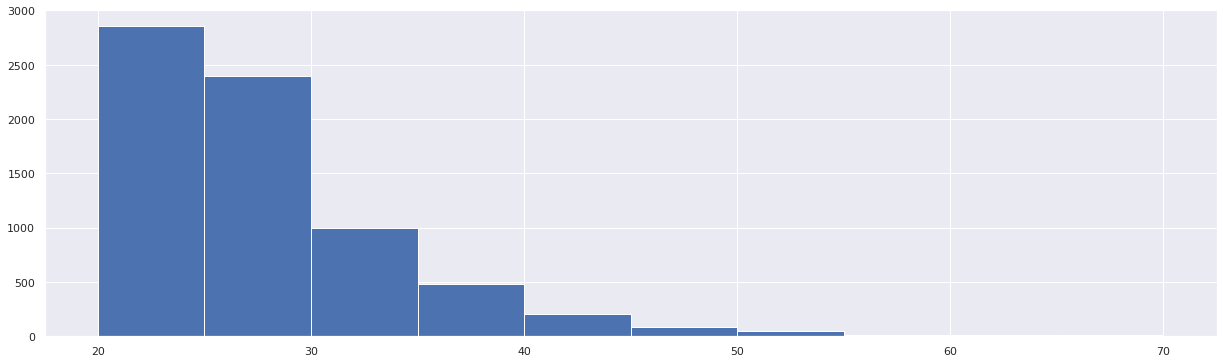

In [15]:
plt.hist(x = default['person_age']); 
## shows the distribuition of the people in debts in age intervals (using a histogram)
## it's important to say that the values at the bottom represent the age and the values at the right size represent the number of people
## since the number of people with more than 60 years is low, the values cannot be observed in this plot

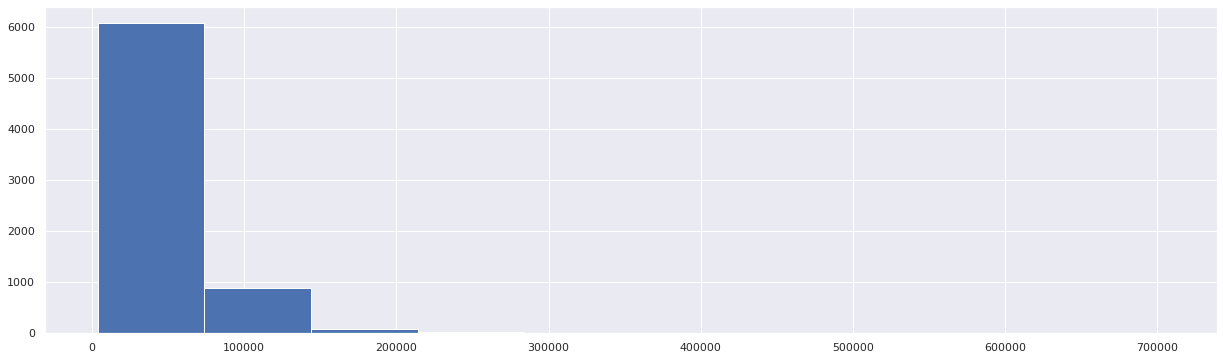

In [16]:
plt.hist(x = default['person_income']);
## shows the distribuition of the people in debts in income intervals (using a histogram)


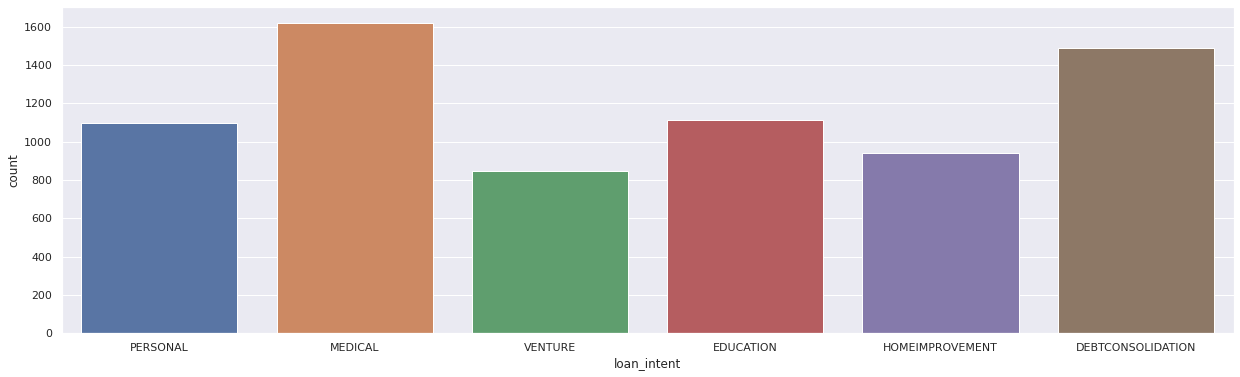

In [18]:
sns.countplot(x = default['loan_intent']);
## shows the distribuition of loan intent between people in debts


**PARTIAL CONCLUSIONS 1:**
* At this moment is possible comprehend that young people are 
substentialy more in debts than older people.
* It is also possible to understand that the proportion of people with debts per people without debts is $7108/25473$.
* The 4th graph shows how people in debts usually have lower incomes.
* The 5th graph shows that Medical and Debit Consolidation loans are the most commom debts.


**FILTERING AND CLUSTERING DATA**:

In [64]:
higher_income = default[default['person_income']>= 10000 ] ## people in debts with income higher than 99999
lower_income = default[default['person_income']< 10000 ] ## people in debts with lower higher than 10000

**GRAPHS BASED IN THESE TWO CLUSTERED PARAMETERS:**

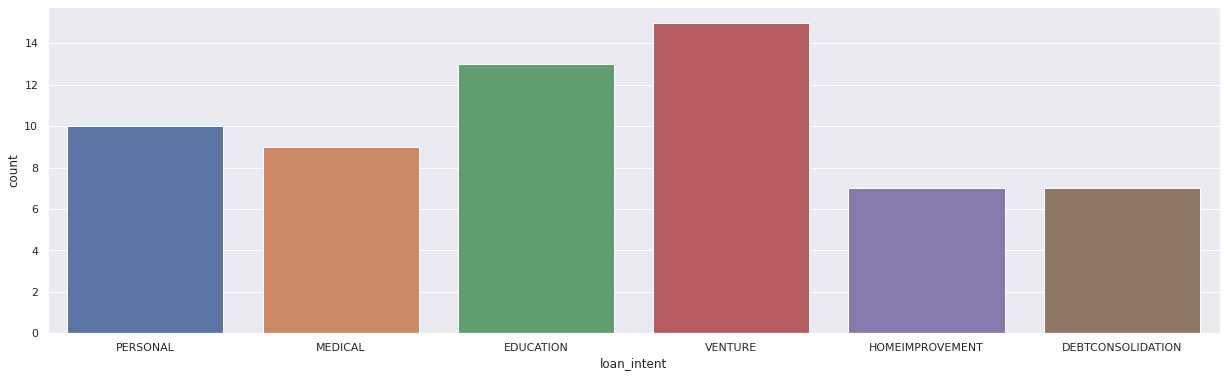

In [65]:
parameter_order = ['PERSONAL','MEDICAL','EDUCATION','VENTURE','HOMEIMPROVEMENT','DEBTCONSOLIDATION']
sns.countplot(x = lower_income['loan_intent'], order = parameter_order);
## shows the distribuition of loan intent between people in debts and income higher than 9999

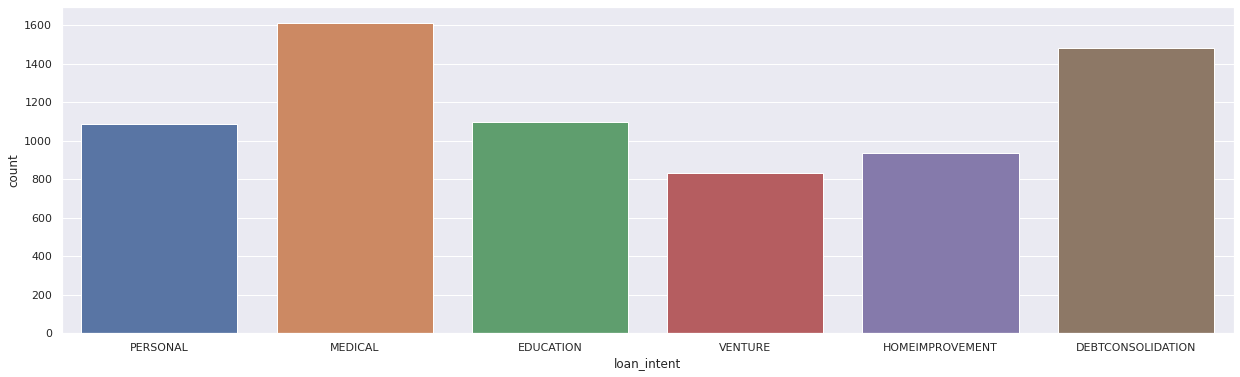

In [66]:
parameter_order = ['PERSONAL','MEDICAL','EDUCATION','VENTURE','HOMEIMPROVEMENT','DEBTCONSOLIDATION']
sns.countplot(x = higher_income['loan_intent'], order = parameter_order);
## shows the distribuition of loan intent between people in debts and income lower than 10000

**PARTIAL CONCLUSIONS 2:**
* Now is possible to understand that people with lower income  and debts usually use more the loans to pay for venture and education purposes.
* Although, people with higher income and debts use more the loans to pay for medical and debt consolidation purposes.
* At a first look it is acceptable to think that, to people with lower income, loans destined to venture and education purposes are more risky. For people with higher income, loans destined to medical and debt consolidation purposes are more risky.
